### Modelos de Classificação

https://github.com/ageron/handson-ml3 <br>
https://github.com/ageron/handson-ml2

### Etapas

1. Olhar para o quadro geral;
2. Obter os dados;
3. Descobrir e visualizar os dados para obter informações;
4. Preparar os dados para os algoritmos do Aprendizado de Máquina;
5. Selecionar e treinar um modelo;
6. Ajustar o seu modelo;
7. Apresentar sua solução;
8. Lançar, monitorar e manter seu sistema.


### Apendice B
#### Lista de Verificação do Projeto de Aprendizado de Máquina

1. Foque o problema e olhe para o quadro geral;
2. Obtenha os dados;
3. Explore os dados para obter insights;
4. Prepare os dados para melhor expor os padrões de dados subjacentes aos algoritmos do Aprendizado de Máquina;
5. Explore vários diferentes modelos e liste os melhores;
6. Ajuste seus modelos e combine-os em uma ótima solução;
7. Apresente sua solução;
8. Lance, monitore e faça a manutenção de seu sistema.

### Importando Dataset

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X.shape, y.shape

((70000, 784), (70000,))

In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
import matplotlib.pyplot as plt  

In [9]:
def show_image(image_data):
    X_image = image_data.reshape(28, 28)
    plt.imshow(X_image, cmap='binary')
    plt.show()

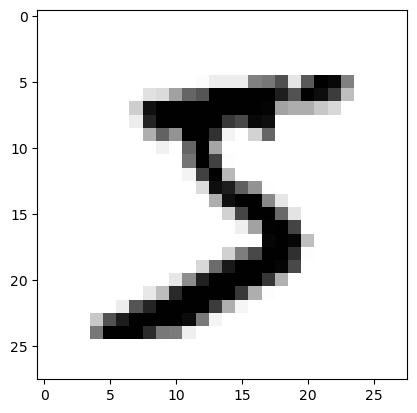

(None, '5')

In [10]:
some_digit = X[0]
show_image(some_digit), y[0]

### Dividindo o Dataset em Treino e Teste

In [11]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [13]:
y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5') 

In [14]:
y_train_5, y_test_5

(array([ True, False, False, ...,  True, False, False]),
 array([False, False, False, ..., False,  True, False]))

In [15]:
from sklearn.linear_model import SGDClassifier

sdg = SGDClassifier(random_state=42)
sdg.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
sdg.predict(some_digit.reshape(1, -1))

array([ True])

### Avaliando o Modelo de Classificação

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sdg, x_train, y_train_5, cv=3, scoring='accuracy')

In [18]:
def display_results(scores): 
    print('Scores: ', scores)
    print('Média do score: ', f'{scores.mean(): .2f}')

In [19]:
display_results(scores)

Scores:  [0.95035 0.96035 0.9604 ]
Média do score:   0.96


In [20]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(x_train, y_train_5)

scores_dummmy = cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring='accuracy')
display_results(scores_dummmy)

Scores:  [0.90965 0.90965 0.90965]
Média do score:   0.91


##### Implementando código para Validação Cruzada:

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score, make_scorer


def cross_validation_score(model, X, y, cv):
    skt = StratifiedKFold(n_splits=cv)
    for i, (train_index, test_index) in enumerate(skt.split(X, y)):

        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")    
        clone_model = clone(model)
        X_train_fold = X[train_index]
        y_train_fold = y[train_index]

        X_test_fold = X[test_index]
        y_test_fold = y[test_index]

        clone_model.fit(X_train_fold, y_train_fold)
        y_pred_fold = clone_model.predict(X_test_fold)

        score_fold = accuracy_score(y_test_fold, y_pred_fold)

        print(score_fold)

In [22]:
cross_validation_score(model=sdg, X = x_train, y = y_train_5, cv=3)

Fold 0:
  Train: index=[19964 19965 19966 ... 59997 59998 59999]
  Test:  index=[    0     1     2 ... 20331 20342 20359]
0.95035
Fold 1:
  Train: index=[    0     1     2 ... 59997 59998 59999]
  Test:  index=[19964 19965 19966 ... 40088 40125 40127]
0.96035
Fold 2:
  Train: index=[    0     1     2 ... 40088 40125 40127]
  Test:  index=[39988 39989 39990 ... 59997 59998 59999]
0.9604


In [23]:
cross_val_score(sdg, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [24]:
from sklearn.model_selection import cross_val_predict

y_pred_5 = cross_val_predict(sdg, x_train, y_train_5, cv=3)
print(y_pred_5)


[ True False False ...  True False False]


Each row in a confusion matrix represents an actual class, while each column
represents a predicted class. The first row of this matrix considers non-5
images (the negative class): 53,892 of them were correctly classified as non-
5s (they are called true negatives), while the remaining 687 were wrongly
classified as 5s (false positives, also called type I errors). The second row
considers the images of 5s (the positive class): 1,891 were wrongly classified
as non-5s (false negatives, also called type II errors), while the remaining
3,530 were correctly classified as 5s (true positives). A perfect classifier
would only have true positives and true negatives, so its confusion matrix
would have nonzero values only on its main diagonal (top left to bottom
right):

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_pred_5)
cm


TP = cm[1, 1]
TN = cm[0,0]
FN = cm[1, 0]
FP = cm[0, 1]

print('Matriz de confusão\n',cm)
print('Verdadeiros positivos:', TP)
print('Verdadeiros negativos:', TN)
print('Falsos negativos:', FN)
print('Falsos positivos:', FP)


Matriz de confusão
 [[53892   687]
 [ 1891  3530]]
Verdadeiros positivos: 3530
Verdadeiros negativos: 53892
Falsos negativos: 1891
Falsos positivos: 687


In [26]:
y_pred_perfect = y_train_5

cm_perfect = confusion_matrix(y_train_5, y_pred_perfect)
cm_perfect

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [27]:
# Precision

precision_ = round(TP / (TP + FP) * 100, 2)


# Recall or Sensitivity

recall_ = round(TP / (TP + FN) * 100, 2)

In [28]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_pred_5)
recall = recall_score(y_train_5, y_pred_5)

Now our 5-detector does not look as shiny as it did when we looked at its
accuracy. When it claims an image represents a 5, it is correct only 83.7% of
the time. Moreover, it only detects 65.1% of the 5s.


In [29]:
print('Recall:', recall_, f'{recall*100: .2f}')
print('Precision:', precision_, f'{precision*100: .2f}')

Recall: 65.12  65.12
Precision: 83.71  83.71


In [30]:
from sklearn.metrics import f1_score

fscore = f1_score(y_train_5, y_pred_5)
print('f1_score:', f'{fscore*100: .2f}')

f1_score:  73.25


In [31]:
y_scores = sdg.decision_function(x_train)
print(y_scores)

[  2164.22030239  -5897.37359354 -13489.14805779 ...   6007.43513003
   -695.89564908  -3991.49590678]


In [32]:
threshold = 0
y_some_digit_score = sdg.decision_function(some_digit.reshape(1, -1))
print(y_some_digit_score)

print(y_some_digit_score > threshold)

[2164.22030239]
[ True]


In [33]:
scores_prediction = cross_val_predict(sdg, x_train, y_train_5, cv=3, method='decision_function')

In [53]:
from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_train_5, scores_prediction)

In [35]:
precision[:-1]

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [36]:
threshold = 0

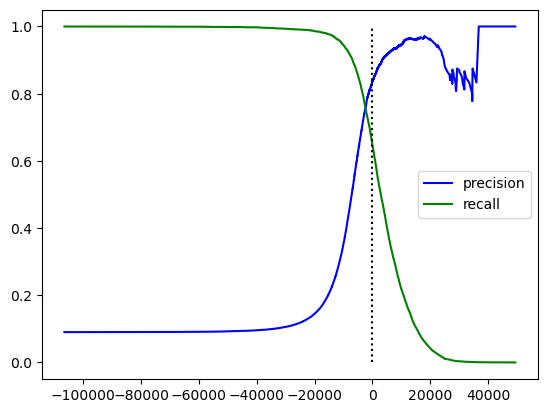

In [37]:
plt.plot(thresholds, precision[:-1], label = 'precision', color = 'blue')
plt.plot(thresholds, recall[:-1], label = 'recall',  color = 'green')
plt.vlines(threshold, 0, 1.0 ,linestyles='dotted', color = 'black')
plt.legend()
plt.show()

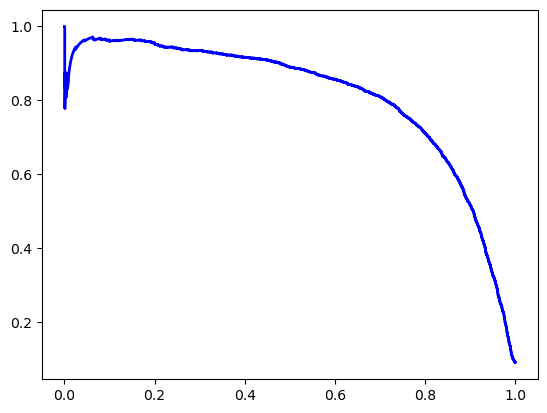

In [38]:
plt.plot(recall[:-1], precision[:-1], color = 'blue', linewidth=2, label="Precision/Recall curve")

In [39]:
idx_for_90_precision = (precision >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [40]:
threshold_for_90_precision

3370.0194991439594

In [41]:
y_pred = (scores_prediction >= threshold_for_90_precision)

In [42]:
y_pred

array([False, False, False, ...,  True, False, False])

In [43]:
precision_max = precision_score(y_train_5, y_pred)
precision_max

recall = recall_score(y_train_5, y_pred)
recall

0.4799852425751706

##### The ROC Curve
The receiver operating characteristic (ROC) curve is another common tool
used with binary classifiers. It is very similar to the precision/recall curve, but
instead of plotting precision versus recall, the ROC curve plots the true
positive rate (another name for recall) against the false positive rate (FPR).
The FPR (also called the fall-out) is the ratio of negative instances that are
incorrectly classified as positive. It is equal to 1 – the true negative rate
(TNR), which is the ratio of negative instances that are correctly classified as
negative. The TNR is also called specificity. Hence, the ROC curve plots
sensitivity (recall) versus 1 – specificity.

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, scores_prediction)

In [45]:
thresholds

array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

[]

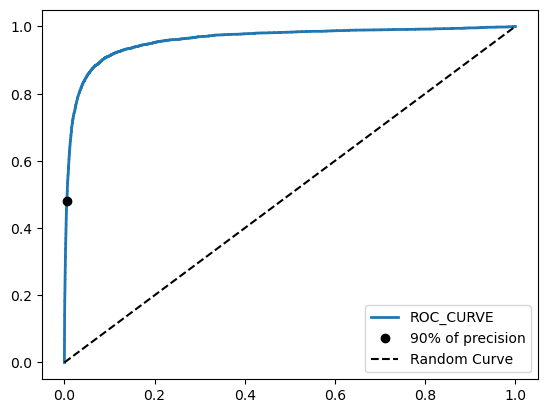

In [46]:

idx_for_90_precision = (thresholds <= threshold_for_90_precision).argmax()
tpr_for_90_precision, fpr_for_90_precision = tpr[idx_for_90_precision], fpr[idx_for_90_precision]
 

plt.plot(fpr, tpr, linewidth = 2, label = 'ROC_CURVE')
plt.plot([fpr_for_90_precision], [tpr_for_90_precision], 'o', color = 'black', label = '90% of precision')
plt.plot([0,1], [0,1], '--', color = 'black', label = 'Random Curve')

plt.legend()
plt.plot()

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, scores_prediction)

0.9604938554008616

Since the ROC curve is so similar to the precision/recall (PR) curve, you may wonder how
to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever
the positive class is rare or when you care more about the false positives than the false
negatives. Otherwise, use the ROC curve. For example, looking at the previous ROC
curve (and the ROC AUC score), you may think that the classifier is really good. But this
is mostly because there are few positives (5s) compared to the negatives (non-5s). In
contrast, the PR curve makes it clear that the classifier has room for improvement: the
curve could really be closer to the top-right corner (see Figure 3-6 again).

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

In [49]:
rf_scores = cross_val_predict(rf, x_train, y_train_5, cv = 3, method='predict_proba')

In [50]:
rf_scores[:, 1]

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [51]:
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train_5, rf_scores[:,1])

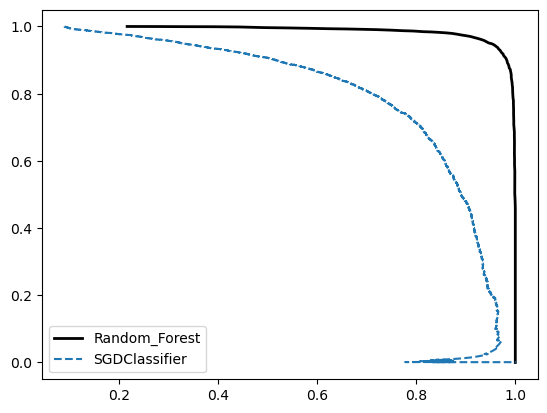

In [55]:
plt.plot(precisions_rf, recalls_rf, linewidth = 2, color = 'black', label = 'Random_Forest')
plt.plot(precision, recall, '--' , label = 'SGDClassifier')
plt.legend()
plt.show()

In [56]:
y_randonm_pred = (rf_scores[:, 1] > 0.5)

f1_score_rf = f1_score(y_train_5, y_randonm_pred)
print(f1_score_rf)


roc_auc_curve_rf = roc_auc_score(y_train_5, y_randonm_pred)
print(roc_auc_curve_rf)

0.9242275142688446
0.9327181722735077


#### MULTICLASS CLASSIFICATION


Some Scikit-Learn classifiers (e.g., LogisticRegression,
RandomForestClassifier, and GaussianNB) are capable of handling multiple
classes natively. Others are strictly binary classifiers (e.g., SGDClassifier and
SVC). However, there are various strategies that you can use to perform
multiclass classification with multiple binary classifiers.
One way to create a system that can classify the digit images into 10 classes
(from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector,
a 1-detector, a 2-detector, and so on). Then when you want to classify an
image, you get the decision score from each classifier for that image and you
select the class whose classifier outputs the highest score. This is called the
one-versus-the-rest (OvR) strategy, or sometimes one-versus-all (OvA).
Another strategy is to train a binary classifier for every pair of digits: one to
distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s,
and so on. This is called the one-versus-one (OvO) strategy. If there are N
classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem,
this means training 45 binary classifiers! When you want to classify an
image, you have to run the image through all 45 classifiers and see which
class wins the most duels. The main advantage of OvO is that each classifier
only needs to be trained on the part of the training set containing the two
classes that it must distinguish.
Some algorithms (such as support vector machine classifiers) scale poorly
with the size of the training set. For these algorithms OvO is preferred
because it is faster to train many classifiers on small training sets than to train
few classifiers on large training sets. For most binary classification
algorithms, however, OvR is preferred.

In [57]:
from sklearn.svm import SVC

svc_clf = SVC(random_state = 42)

svc_clf.fit(x_train[:2000], y_train[:2000])

SVC(random_state=42)

In [58]:
svc_clf.predict(some_digit.reshape(1, -1))
some_digit_scores = svc_clf.decision_function(some_digit.reshape(1, -1))
print(some_digit_scores.round(2))
print(svc_clf.classes_)
print(svc_clf.classes_[5])

[[ 3.79  0.73  6.06  8.3  -0.29  9.3   1.75  2.77  7.21  4.82]]
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
5


In [59]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier


ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [62]:
ovr_clf.predict(some_digit.reshape(1,-1))
len(ovr_clf.estimators_)

10

In [64]:
from sklearn.linear_model import SGDClassifier


sdg_clf = SGDClassifier(random_state=42)
sdg_clf.fit(x_train, y_train)
sdg_clf.predict(some_digit.reshape(1,-1)) 

array(['3'], dtype='<U1')

In [65]:
sgd_scores = cross_val_score(sdg_clf, x_train, y_train, scoring='accuracy', cv=3)
print(sgd_scores)

[0.87365 0.85835 0.8689 ]


In [66]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train_scaler = std.fit_transform(x_train.astype('float64'))
sgd_scores_scaling = cross_val_score(sdg_clf, x_train_scaler, y_train, scoring='accuracy', cv=3)

[0.87365 0.85835 0.8689 ]


In [67]:
print(sgd_scores_scaling)

[0.8983 0.891  0.9018]


[]

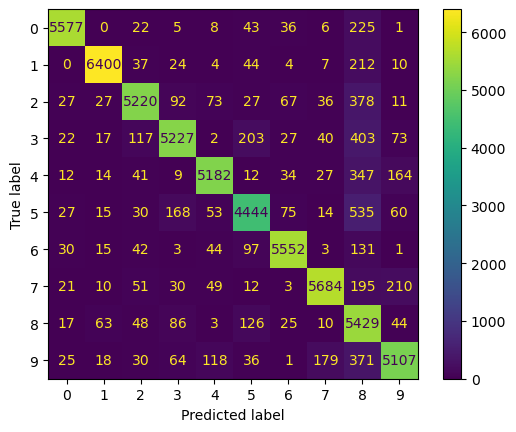

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sdg_clf, x_train_scaler, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.plot()

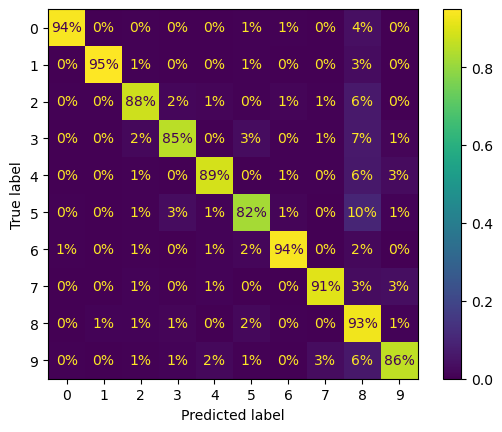

In [70]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%')
plt.show()

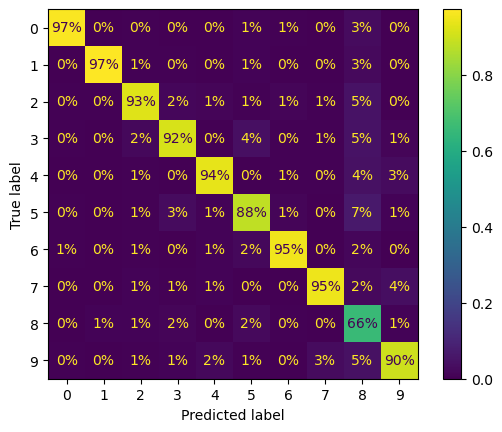

In [71]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='pred', values_format='.0%')
plt.show()

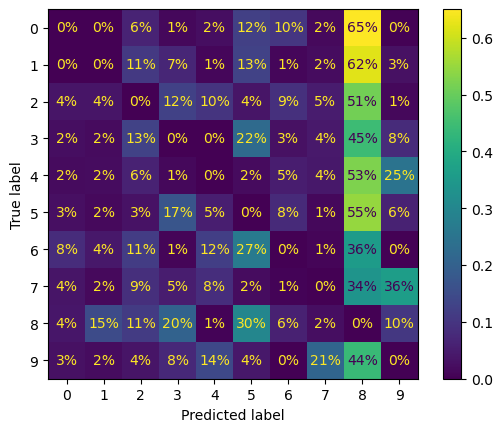

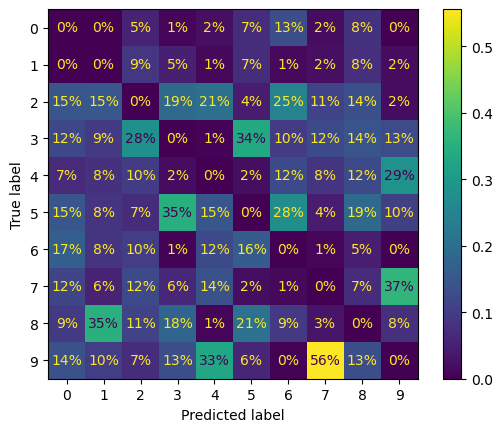

In [69]:
sample_weight = (y_train != y_train_pred)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%', sample_weight=sample_weight)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='pred', values_format='.0%', sample_weight=sample_weight)
plt.show()